# A/B Testing for AD Campaigns on Client Website

In this project, the task was to test whether a particular variant of an AD appearing on a client's website performs better or worse than the other variant of the same AD. 

A/B testing is appropriate here as it will rely on statistical analysis to determine which variant of the AD does better. A/B testing will also give us more objective and statistical evidence that proves which AD is better.

## Import Libraries and Load the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =pd.read_excel('AB Test.xlsx')
df.head()

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


In [3]:
# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 58.8+ KB


In [6]:
# Check any null values

df.isnull().any() # No null values

group     False
action    False
dtype: bool

# Hypothesis Testing Steps

Before commencing on our analysis, I needed to define the steps of my hypothesis testing for this A/B Test.

1) H0 (Null Hypothesis): Click Through Rate (CTR) of the new AD *is less* than the CTR of old AD.

2) H1 (Alternative Hypothesis): The CTR of new AD *is more* than the CTR of old AD.

3) The signiciance level (or alpha) is set to 95%.

4) The p-value used for this significance test is set to 0.05 

5) Draw conclusion based on significance and alpha test.


In [7]:
#Check value counts of our experiment and control ADs
df['group'].value_counts()

#Pretty balanced dataset

experiment    1881
control       1876
Name: group, dtype: int64

**Experiment** is defined as the group involved with receiving the new variation of the ad

**Control** is defined as the group that didn't receive the new ad


In [8]:
#Check what actions did the viewers do when see variant of AD
df.action.value_counts()

#Generally more views than 'views and clicks'

view              3082
view and click     675
Name: action, dtype: int64

When it comes to ADs, we need to be familiar with the concept of 'Click Through Rate'.

**Click Through Rate (CTR)** is the number of clicks AD's receive on their ads per number of impressions.


# Calculate CTR 

In [12]:
# Get dataframe with all observations from control group 
df_control = df.query('group=="control"')

# Compute CTR for control group 
ctr_control = df_control.query('action == "view and click"').index.nunique()/df_control.index.nunique()

#Display the CTR For the control group
print("CTR for Control Group is ", round(ctr_control,2))


CTR for Control Group is  0.19


In [13]:
# Get dataframe with all records from experiment group 
df_experiment = df.query('group=="experiment"')

# Compute click through rate for experiment group 
ctr_experiment = df_experiment.query('action == "view and click"').index.nunique()/df_experiment.index.nunique()

#Display the CTR For the experiment group
print("CTR for Experiment Group is ", round(ctr_experiment,2))

CTR for Experiment Group is  0.17


In [14]:
#Compute the difference in the CTR 
diff = ctr_experiment - ctr_control
#display the difference 
print('Experiment has a lower CTR than Control by ', round(diff,2))

Experiment has a lower CTR than Control by  -0.03


Even though Experiment had a lower CTR than Control, is this statistically significant? Or just happen by chance with the data collected? To check this, we will need to see if we can reject our H0. 

However, with our relatively small sample size, it will be difficult to draw conclusions from our analysis with confidence. Therefore, I employ bootstrapping, a statistical technique for estimating quantities about a population by averaging estimates from small data samples. 

These bootstrapped samples will be constructed by drawing observations from a large data sample one at a time, and returning them back to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once (i.e. Resampling with replacement). 

Concept is related to the Central Limit Theorem, which states that a population with mean (m) and standard deviation (SD), and you take a sufficiently large random sample from this population with replacement, then the distribution of the sample's mean will be approximately normally distributed. 

In [15]:
#bootsrapping our data sample
differences = []
size = df.shape[0]
for i in range(10000):
    sample = df.sample(size,replace=True)
    df_control = sample.query('group=="control"')
    df_experiment = sample.query('group=="experiment"')
    ctr_experiment = df_experiment.query('action == "view and click"').index.nunique()/df_experiment.index.nunique()
    ctr_control = df_control.query('action == "view and click"').index.nunique()/df_control.index.nunique()
    differences.append(ctr_experiment-ctr_control)

In [17]:
differences # an array containing the differences between Experiment and Control CTR in our bootstrapped samples

array([-0.01625223, -0.04299596, -0.05155608, ..., -0.03092784,
       -0.03563176, -0.0312726 ])

## Evaluate H0 and Draw Conclusion Based on Boostrapped Sample

(array([   5.,   59.,  401., 1357., 2655., 2866., 1889.,  643.,  113.,
          12.]),
 array([-0.06607218, -0.05862679, -0.05118139, -0.043736  , -0.0362906 ,
        -0.02884521, -0.02139981, -0.01395442, -0.00650902,  0.00093637,
         0.00838177]),
 <BarContainer object of 10 artists>)

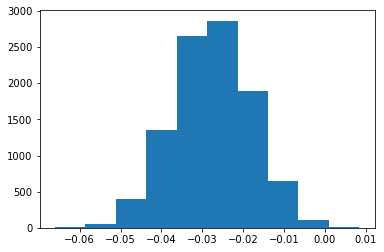

In [16]:
# Plot the sampling distribution 
differences = np.array(differences)
plt.hist(differences) # We can see that it is a normally distributed plot!

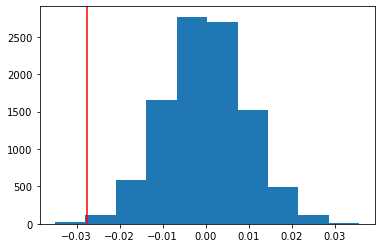

In [20]:
#simulate the distribution under the null hypothesis 
h0 = np.random.normal(0,differences.std(),differences.size)

#plot the null distribution 
plt.hist(h0)
plt.axvline(diff, c='red')

#The null hypothesis is larger than the statistic most of the time

**P-Value** is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

In [23]:
# Compute the  P-value 
print('p-value', round((h0>diff).mean(),4))

#We fail to reject the null hypothesis. 
#It suggest that the New AD performs as well as the Old AD

p-value 0.9978


However, we should note that all changes need to go through some period of time before change is accepted by the audience. So they should wait a bit longer to see if the change is okay. 